Let's prepare some data:

In [26]:
import pandas as pd
from tabulate import tabulate

df = pd.read_json("export/data/apps.json").T

df["star_average"] = sum([i*df ["star%d" % i] for i in range(1, 6)]) / sum(([df ["star%d" % i] for i in range(1, 6)]))


In [27]:

reviewsDf = pd.read_json("export/data/reviews.json")

reviewsDf["locale"] = reviewsDf["locale"].str.replace(".UTF-8", "")

/tmp/ipykernel_71234/1396924359.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewsDf["locale"] = reviewsDf["locale"].str.replace(".UTF-8", "")


Let's look how apps are rated:

<AxesSubplot:title={'center':'Number of ratings per app'}, ylabel='Number of ratings'>

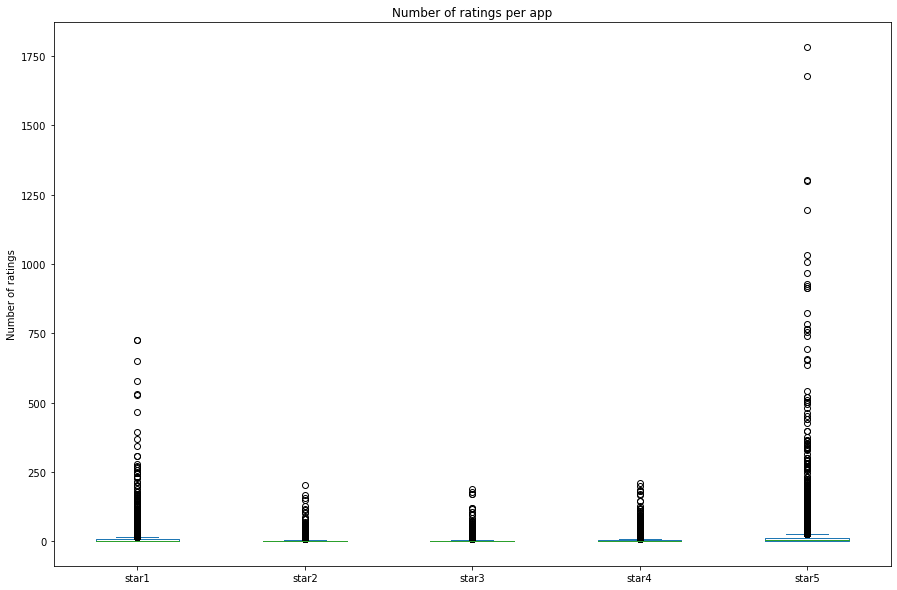

In [28]:
df[["star1", "star2", "star3", "star4", "star5"]].plot.box(title="Number of ratings per app", ylabel="Number of ratings", xlabel="Star rating", figsize=(15, 10))

So it seems like there are far more apps with one stars and five stars then everything else. Not very suprising so far.

So let's look at the raw data and figure out what the mean for each rating is.

<AxesSubplot:title={'center':'Distribution of ratings over all apps'}, xlabel='Star rating', ylabel='Number of ratings'>

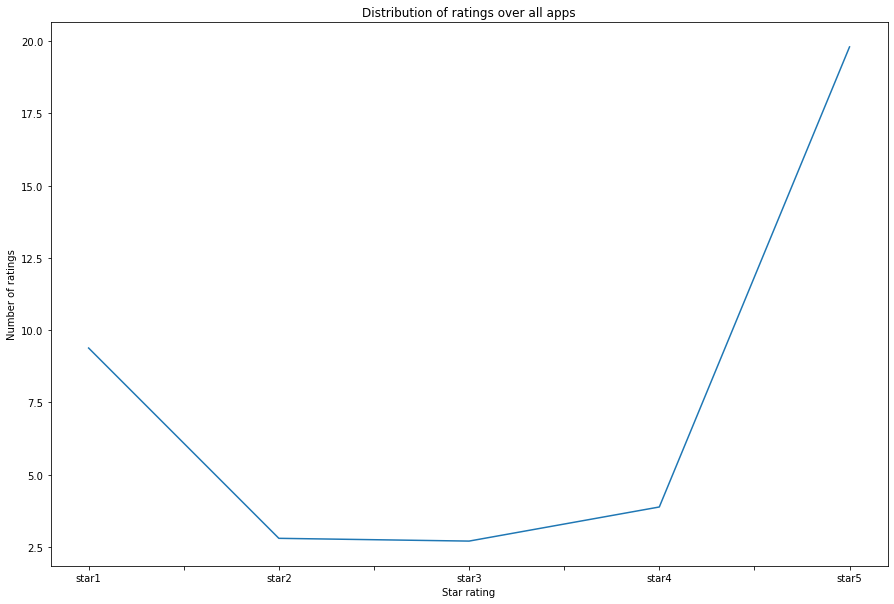

In [29]:
df[["star1", "star2", "star3", "star4", "star5"]].mean().plot(title="Distribution of ratings over all apps", ylabel="Number of ratings", xlabel="Star rating", figsize=(15, 10))

<AxesSubplot:title={'center':'Average number of ratings across all apps'}, ylabel='Rating'>

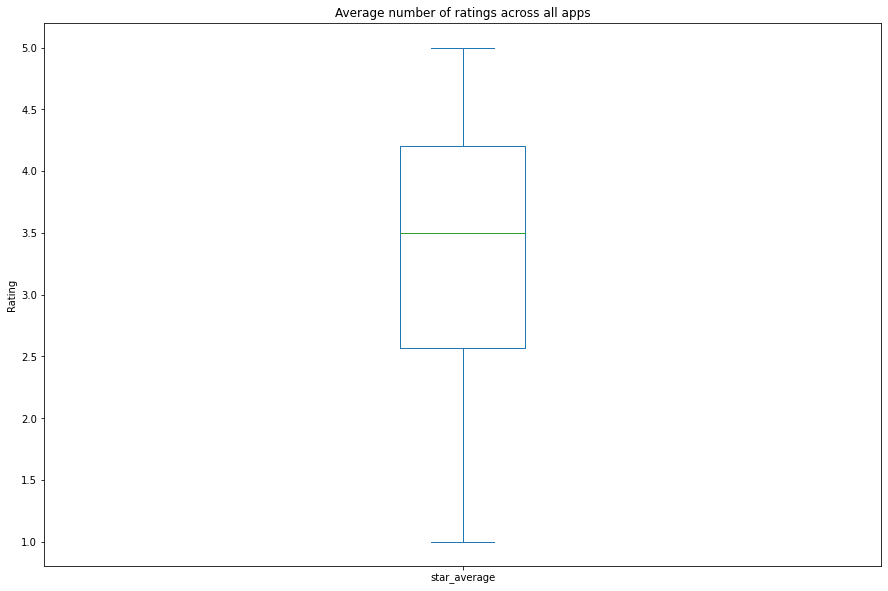

In [30]:
df["star_average"].plot.box(ylabel="Rating", title="Average number of ratings across all apps", figsize=(15, 10))

So the average rating of the apps in the linux ecosystem is around 3.5

Have a look at the top rated apps:

In [64]:
df[df["total"]>20].dropna().nlargest(20,"star_average")[["star_average","total"]]

,star_average,total
org.speedcrunch.SpeedCrunch,4.962963,54
speedcrunch.desktop,4.962963,54
io.snapcraft.mapscii-YmktiCRE0Dg3FvsSwXiNFHeygSzRtyIo,4.909091,22
sublime_text.desktop,4.906250,32
PersianCalendar@oxygenws.com.shell-extension,4.875000,56
PersianCalendar_oxygenws.com,4.875000,56
unite_hardpixel.eu,4.869565,23
com.rafaelmardojai.Blanket,4.868421,38
com.shatteredpixel.shatteredpixeldungeon,4.857143,28
dash-to-panel_jderose9.github.com,4.850829,181


Which distros are these reviews coming from?

<AxesSubplot:title={'center':'Distribution of reviews per distribution'}, ylabel='distro'>

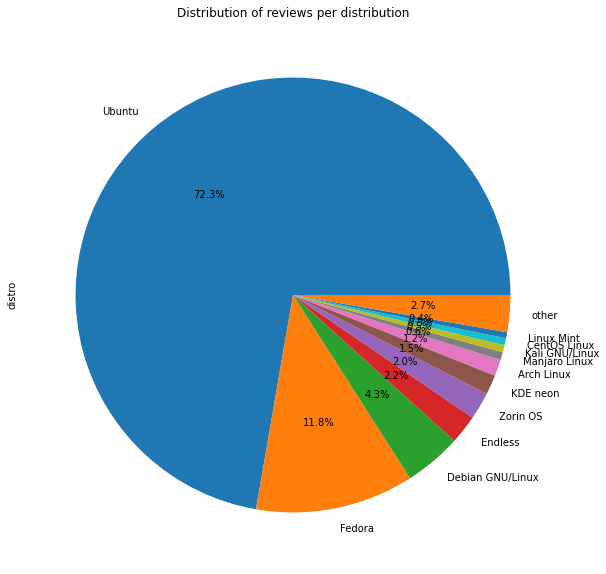

In [48]:
prob = reviewsDf["distro"].value_counts()

mask = prob > 1000
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', title="Distribution of reviews per distribution")

Which languages are these reviews in?

<AxesSubplot:title={'center':'Distribution of reviews per locale'}, ylabel='locale'>

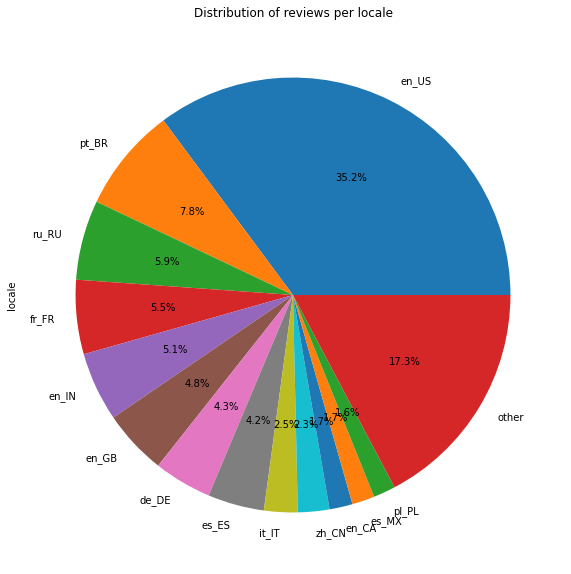

In [50]:
prob = reviewsDf["locale"].value_counts()

mask = prob > 3000
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', title="Distribution of reviews per locale")